In [13]:
# import tools
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Path to folder containing CSVs
folder_path = r"C:\Users\S Das\Downloads\archive (1)\*.csv"

# Read and combine all CSVs in folder
df = pd.concat([pd.read_csv(f) for f in glob.glob(folder_path)], ignore_index=True)

In [15]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region', 'Province/State', 'Lat', 'Long', 'Date',
       'No. of countries', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2',
       'Province_State', 'Country_Region', 'Long_', 'Combined_Key',
       'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop'],
      dtype='object')

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df['TotalDeaths'].head(50)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
Name: TotalDeaths, dtype: float64

In [18]:
df['Mortality Rate'] = df['Deaths'] / df['Confirmed']

In [19]:
df['Recovey Rate'] = df['Recovered'] / df['Confirmed']

In [20]:
df.groupby('Country/Region')['NewCases'].sum().sort_values(ascending=False).head(10)

Country/Region
Mexico                 6590.0
Bolivia                1282.0
Jamaica                  30.0
S. Korea                 20.0
Afghanistan               0.0
Antigua and Barbuda       0.0
Albania                   0.0
Andorra                   0.0
Algeria                   0.0
Australia                 0.0
Name: NewCases, dtype: float64

In [21]:
df.groupby('Country/Region')['TotalCases'].sum().sort_values(ascending=False).head(10)

Country/Region
USA             5032179.0
Brazil          2917562.0
India           2025409.0
Russia           871894.0
South Africa     538184.0
Mexico           462690.0
Peru             455409.0
Chile            366671.0
Colombia         357710.0
Spain            354530.0
Name: TotalCases, dtype: float64

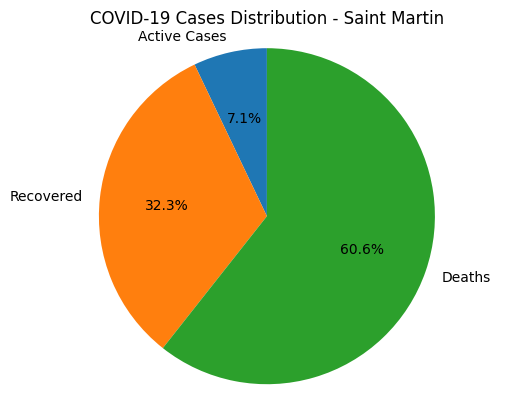

In [22]:
# Pie chart

data = pd.read_csv(r"C:\Users\S Das\Downloads\archive (1)\worldometer_data.csv")
country_data = data[data['Country/Region'] == 'Saint Martin']

active_cases = country_data['ActiveCases'].values[0]
recovered = country_data['TotalRecovered'].values[0]
deaths = country_data['Deaths/1M pop'].values[0]

labels = ['Active Cases','Recovered','Deaths']
sizes = [active_cases, recovered, deaths]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('COVID-19 Cases Distribution - Saint Martin')
plt.axis('equal') 
plt.show()

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed',
       'Deaths', 'date'],
      dtype='object')


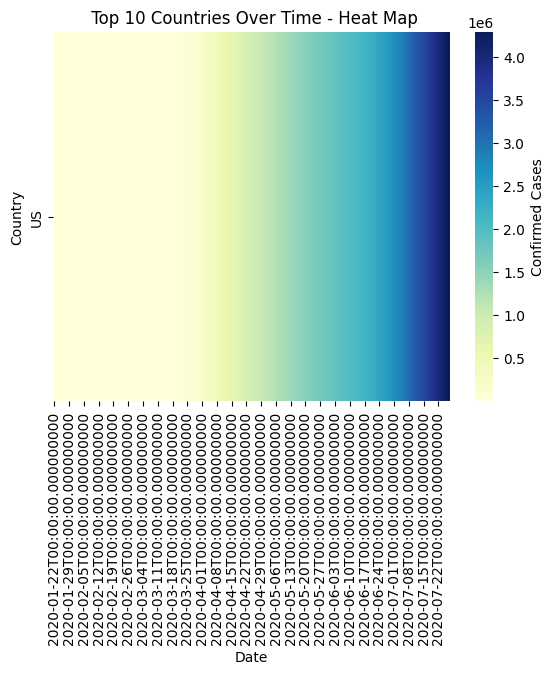

In [23]:
# heatmap

# Load
df = pd.read_csv(r"C:\Users\S Das\Downloads\archive (1)\usa_county_wise.csv")

# Fix date
df['date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Make sure correct column names
print(df.columns)

# Pick top 10 countries
top_country = df.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).head(10).index

# Filter
df_top = df[df['Country_Region'].isin(top_country)]

# Pivot
pivot = df_top.pivot_table(values='Confirmed', index='Country_Region', columns='date', aggfunc='sum')

# Plot heatmap
plt.figure()
sns.heatmap(pivot, cmap='YlGnBu', cbar_kws={'label': 'Confirmed Cases'})
plt.title(' Top 10 Countries Over Time - Heat Map')
plt.xlabel('Date')
plt.ylabel('Country')
plt.show()


In [24]:
df.fillna(0, inplace=True)

In [53]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region', 'Province/State', 'Lat', 'Long', 'Date',
       'No. of countries', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2',
       'Province_State', 'Country_Region', 'Long_', 'Combined_Key',
       'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop'],
      dtype='object')

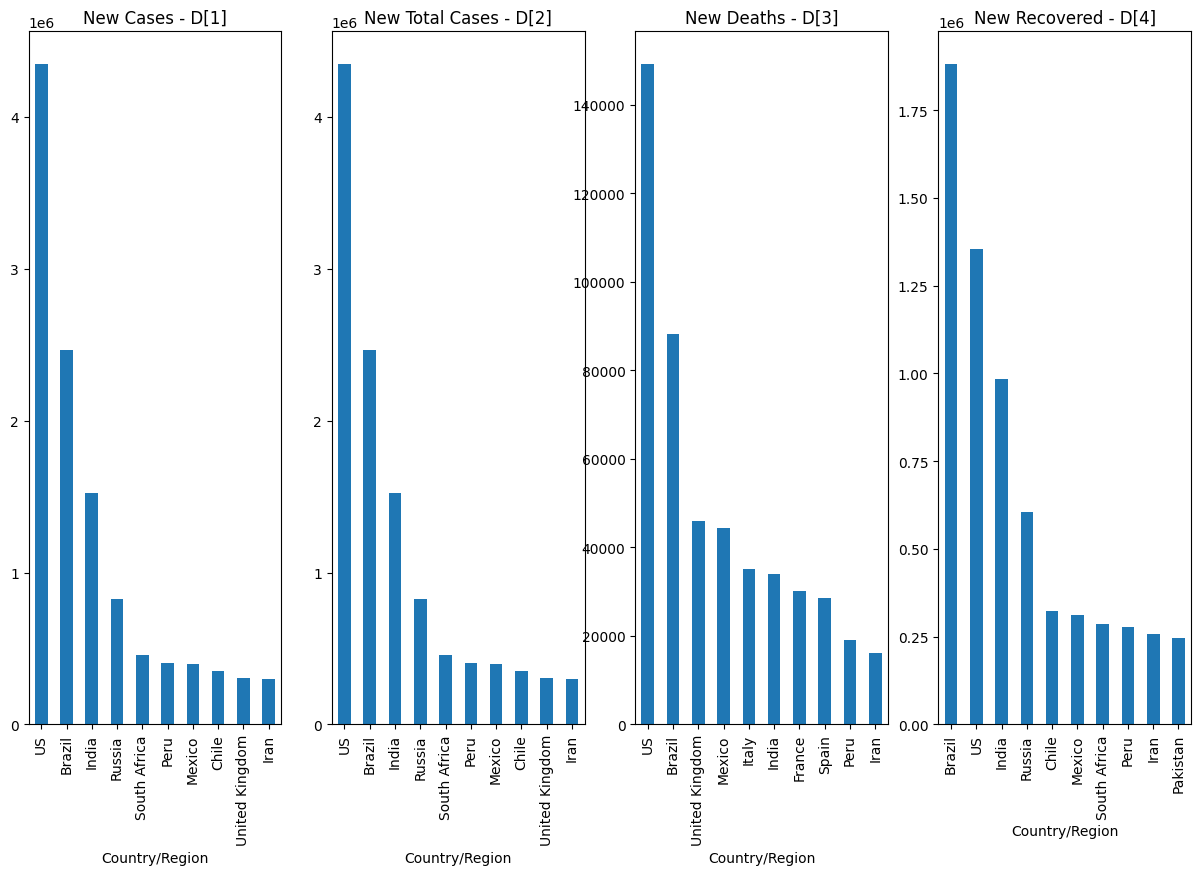

In [56]:
# compare new cases and total cases together

# loads
import matplotlib.pyplot as plt
import pandas as pd

# file origin
folder_path = r"C:\Users\S Das\Downloads\archive (1)\*.csv"

# Read and combine all CSVs in folder
df = pd.concat([pd.read_csv(f) for f in glob.glob(folder_path)], ignore_index=True)

fig, ax = plt.subplots(1, 4, figsize=(15, 9))

# new cases
df_new_cases = df[df['Country/Region'].isin(top_country)]
df_new_cases = df.groupby('Country/Region')['New cases'].sum().sort_values(ascending=False).head(10).plot(kind='bar' , ax=ax[0])
ax[0].set_title('New Cases - D[1]')

# total cases
df_total_cases = df[df['Country/Region'].isin(top_country)]
df_total_cases = df.groupby('Country/Region')['New cases'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax[1])
ax[1].set_title('New Total Cases - D[2]')

# new deaths
df_new_deaths = df[df['Country/Region'].isin(top_country)]
df_new_deaths = df.groupby('Country/Region')['New deaths'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax[2])
ax[2].set_title('New Deaths - D[3]')

# new recovered
df_new_recovered = df[df['Country/Region'].isin(top_country)]
df_new_recovered = df.groupby('Country/Region')['New recovered'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax[3])
ax[3].set_title('New Recovered - D[4]')

plt.show()